## <u>Portugal Bank Marketing</u>

- Predicting Term Deposit Subscription by a client

<u>Bank client data:</u>

        1) age (numeric)
        2) job: type of
        job(categorical:"admin.","bluecollar","entrepreneur","housemaid","management","retired","selfemployed","services","student","technician","unemployed","unknown")
        3) marital: marital status (categorical: "divorced","married","single","unknown"; note: "divorced"
        means divorced or widowed)
        4) education: education of individual (categorical:
        "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","u
        nknown")
        5) default: has credit in default? (categorical: "no","yes","unknown")
        6) housing: has housing loan? (categorical: "no","yes","unknown")
        7) loan: has personal loan? (categorical: "no","yes","unknown")
        Related with the last contact of the current campaign:
        8) contact: contact communication type (categorical: "cellular","telephone")
        9) month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
        10) dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
        11) duration: last contact duration, in seconds (numeric). Important note: this attribute highly
        affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call
        is performed. Also, after the end of the call y is obviously known. Thus, this input should only be
        included for benchmark purposes and should be discarded if the intention is to have a realistic
        predictive model
        Other attributes:
        12) campaign: number of contacts performed during this campaign and for this client (numeric,
        includes last contact)
        13) pdays: number of days that passed by after the client was last contacted from a previous
        campaign (numeric; 999 means client was not previously contacted)
        14) previous: number of contacts performed before this campaign and for this client (numeric)
        15) poutcome: outcome of the previous marketing campaign (categorical:
        "failure","nonexistent","success")
        Social and economic context attributes
        16) emp.var.rate: employment variation rate - quarterly indicator (numeric)
        17) cons.price.idx: consumer price index - monthly indicator (numeric)
        18) cons.conf.idx: consumer confidence index - monthly indicator (numeric)
        19) concavepoints_se: standard error for number of concave portions of the contour
        20) euribor3m: euribor 3 month rate - daily indicator (numeric)
        21) nr.employed: number of employees - quarterly indicator (numeric)
        Output variable (desired target):
        22) y: has the client subscribed a term deposit? (binary: "yes","no")

<u>Scope:</u>

    ● Sentiment analysis in a variety of forms
    ● Data Pre-processing
    ● Training data using SVM
    ● Hyperparameter Tuning 

<u>Learning Outcome:</u>
    
    The students will get a better understanding of how the variables are linked to each other and should be able to predict whether a client of a bank will subscribe to a term deposit or not such that banks can plan the different campaigns for different customers according to the patterns.

https://www.linkedin.com/in/nikunj-gada/

Lets start by importing necessary libraries

In [1]:
# to load the dataset
import pandas as pd
# For EDA
import matplotlib.pyplot as plt
import seaborn as sns
# Override pyplot settings by seaborn theme
sns.set()
# for necessary computation and evaluation
import numpy as np
# To display maximum columns
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')

Load the dataset into a dataframe

In [2]:
df = pd.read_csv(r'bank.csv', header = 0,sep=';')

    #read_csv function :: will load the dataset into a pandas dataframe. 
    Here we use header = 0 to specify that headers are present in the dataset.
    We use the sep parameter for Delimiter to use ';' as our file has ';' separated values

Printing the first 5 and the last 5 elements of the dataframe to check of the data is loaded in the correct format

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


We shall now check the datatype of each column using the info fucntion

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<u>Numeric columns</u> 

       :: age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed

<u>Categorical Columns </u>

       :: job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y(target)

<u>Insights</u> 

    1. We check the whether the numeric and categorical columns are obtained as mentioned in the problem statement.
    2. Upon checking, we find out the the column :: <u>concavepoints_se</u> is not present while loading the data frame
    3. let us confirm on the above point by checking the shape of the dataframe
    4. If the shape of the dataframe matches with the cumber o variables provided in the dataset we shall check what is missed while loading our dataframe else we shall conclude that the mentioned variable in the problem statement is absent


In [6]:
print(f'Number of rows is {df.shape[0]} and number of columns are {df.shape[1]}')
# f - string literal :: allows us to include python computation code in the print statement separated by {} braces

Number of rows is 41188 and number of columns are 21


<u>Insights</u> 
    
    1. We see that the shape of the dataframe is 21 columns and hence we conclude that the problem statement has an extra parameter but the dataset given doesnot.
    2. In such cases, we can get back to the client to check if the parameter was missed or the problem statement needs correction.
    3. Based on the client'sinput we shall go ahead with the analytics.
    4. For now we will assume that the problem statement needs correction

Let us check the dataframe description

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let us check if there are any duplicate data in the datset

In [8]:
df.duplicated().sum()

12

<u>Insights</u>

    - We see that we have found 12 duplicate values in the dataset. We shall frop these duplicated rows

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
print(f'Number of rows is {df.shape[0]} and number of columns are {df.shape[1]}')

Number of rows is 41176 and number of columns are 21


<u>Insights</u>
    - We see that the duplicated rows are deleted from the dataset

let us now check for missing values in the dataset

In [11]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<u>Insights</u> 

    - We see that there are no missing values in the dataset.
    - To be sure that there are no unknown values we shall print unique values for each columns to be sure of the data

In [12]:
def print_unique_values(df):
    for colname in df.columns:
        print(f'--------- {colname} -----------')
        print(df[colname].unique(),'\nCount ::', df[colname].nunique(),'\n')

The above function shall print all the unique values in each columns

In [13]:
print_unique_values(df)

--------- age -----------
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89] 
Count :: 78 

--------- job -----------
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 
Count :: 12 

--------- marital -----------
['married' 'single' 'divorced' 'unknown'] 
Count :: 4 

--------- education -----------
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 
Count :: 8 

--------- default -----------
['no' 'unknown' 'yes'] 
Count :: 3 

--------- housing -----------
['no' 'yes' 'unknown'] 
Count :: 3 

--------- loan -----------
['no' 'yes' 'unknown'] 
Count :: 3 

--------- contact -----------
['telephone' 'cellular'] 
Count :: 2 

--------- month

<u>Insights</u>

    - We see that we do not have any special characters in the unique values
    - we can conclude there are no missing values in the dataset

Let us perform some EDA on the categorical variables

We shall plot the value counts for all the categorical variable and check how the data is spread

In [14]:
# Below block of code shall separate cat and numeric variables for EDA
category_features = []
numeric_feature = []
for col in df.columns:
    if df[col].dtype == 'object':
        category_features.append(col)
    else :
        numeric_feature.append(col)

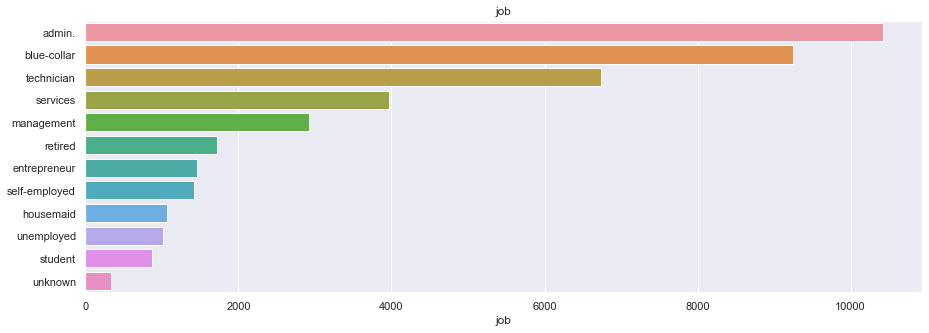

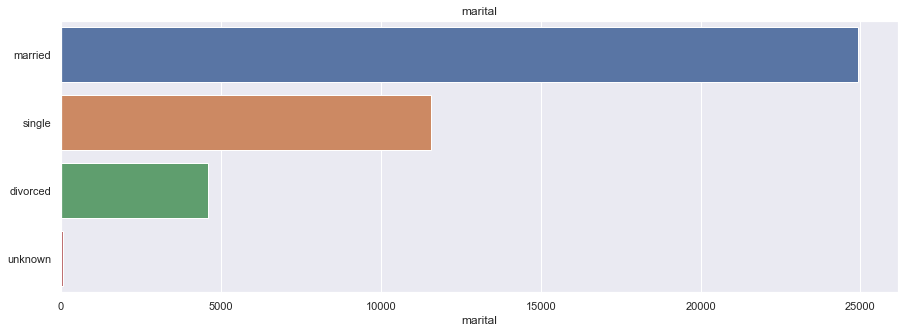

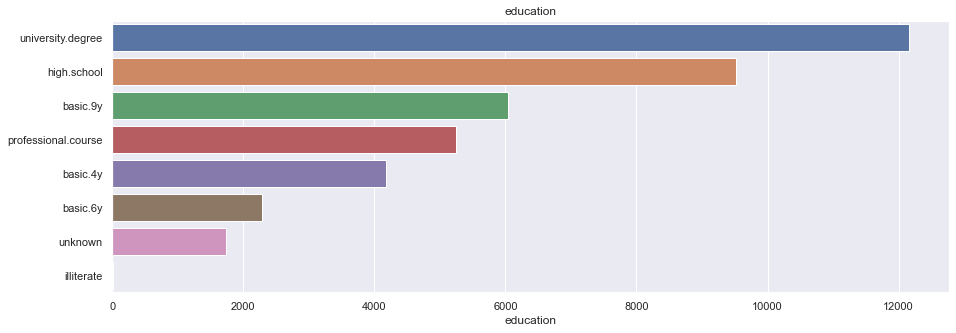

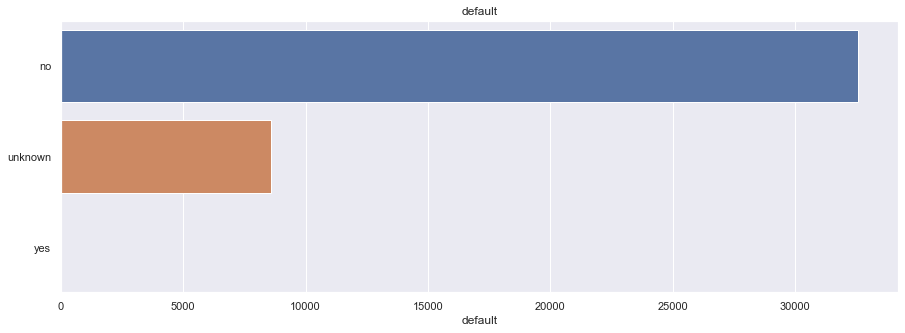

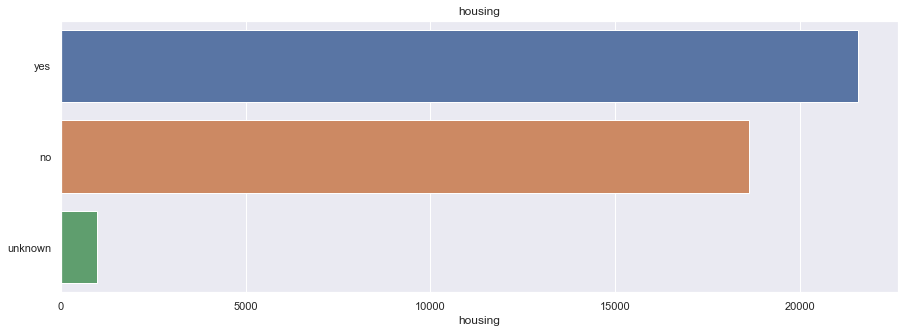

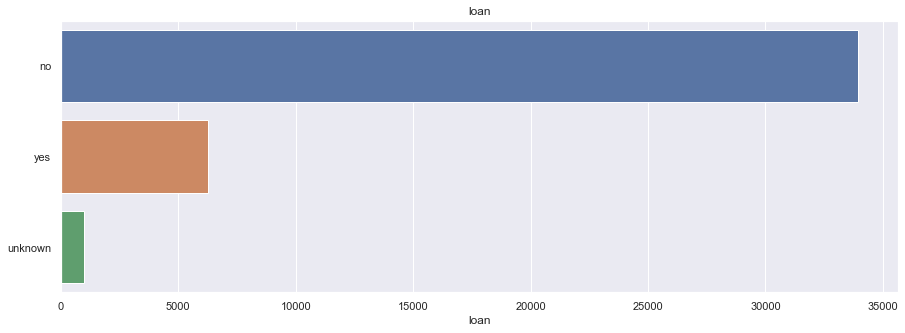

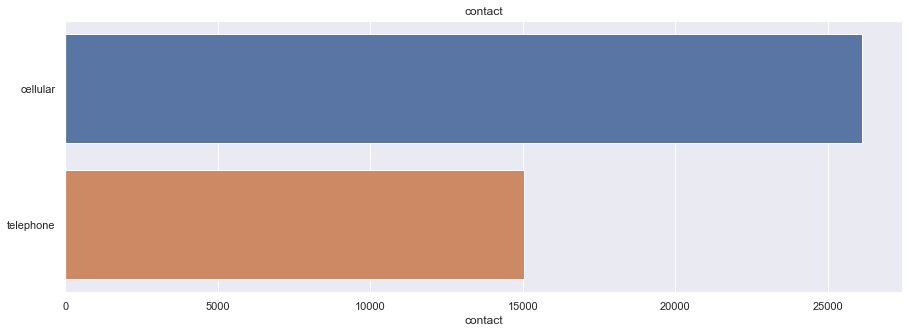

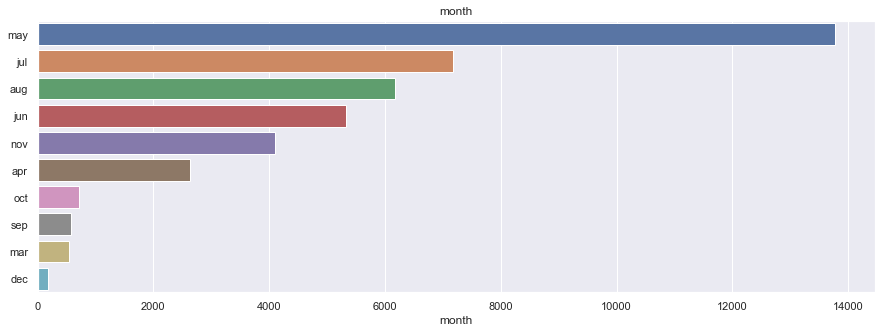

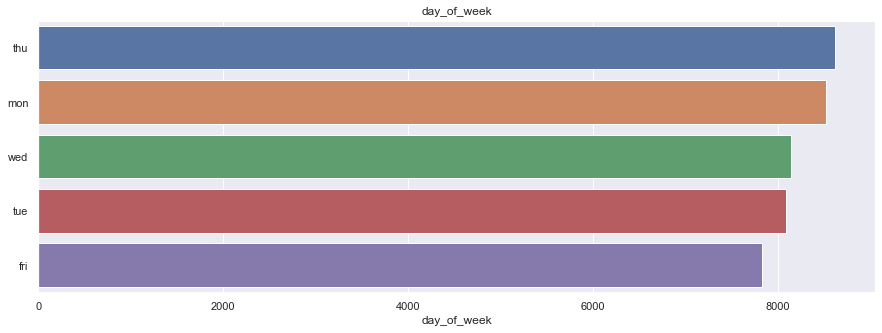

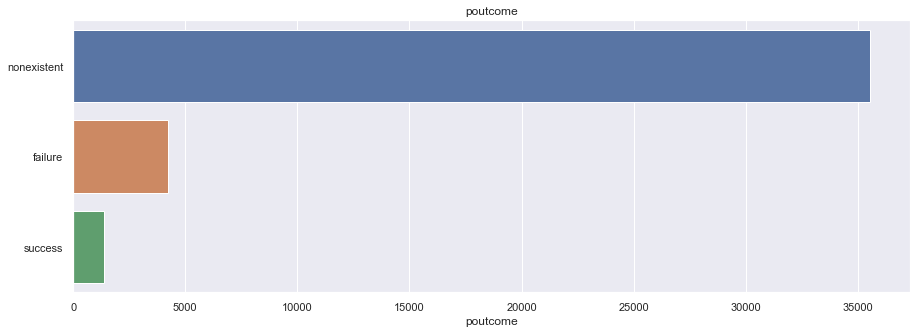

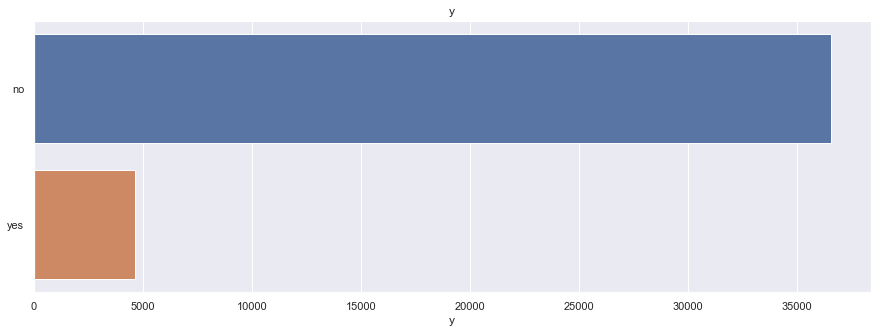

In [15]:
# looping through all variables to get their counts
for col in category_features:
    plt.figure(figsize=(15,5))    
    sns.barplot(df[col].value_counts(), df[col].value_counts().index, data=df)    
    plt.title(col)

In [16]:
for col in category_features[0:-1]:
    print(f'\n--------- {col} -----------') 
    print(df.groupby(col)['y'].value_counts(normalize=True))


--------- job -----------
job            y  
admin.         no     0.870333
               yes    0.129667
blue-collar    no     0.931049
               yes    0.068951
entrepreneur   no     0.914835
               yes    0.085165
housemaid      no     0.900000
               yes    0.100000
management     no     0.887825
               yes    0.112175
retired        no     0.747381
               yes    0.252619
self-employed  no     0.895144
               yes    0.104856
services       no     0.918578
               yes    0.081422
student        no     0.685714
               yes    0.314286
technician     no     0.891675
               yes    0.108325
unemployed     no     0.857988
               yes    0.142012
unknown        no     0.887879
               yes    0.112121
Name: y, dtype: float64

--------- marital -----------
marital   y  
divorced  no     0.896769
          yes    0.103231
married   no     0.898439
          yes    0.101561
single    no     0.859910
          y

The above set of code gives us how our categorical variables are % grouped on the basis of whether they have agreed to apply for tem deposit or no

The same is visualized in the below graphs

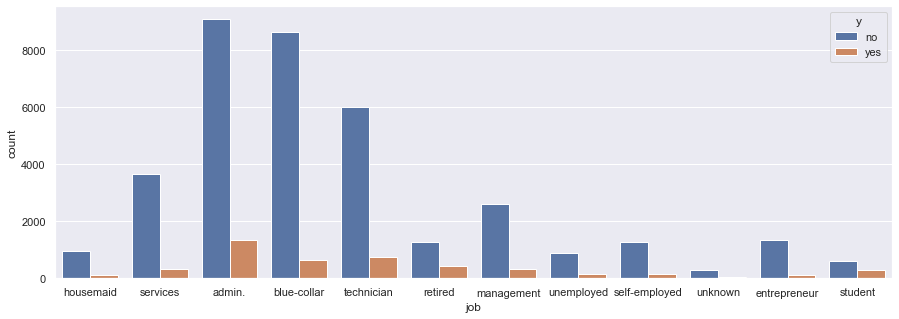

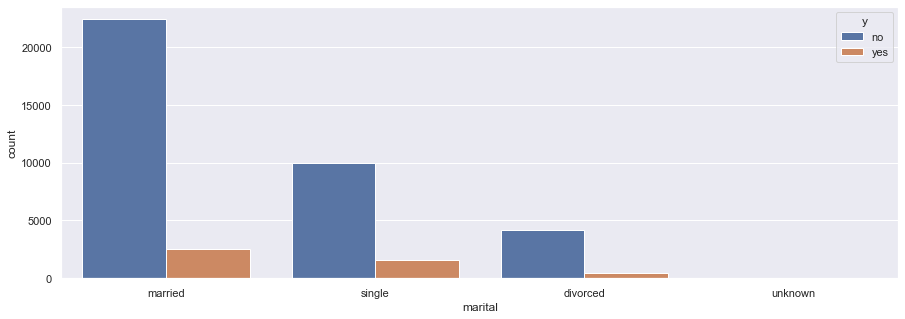

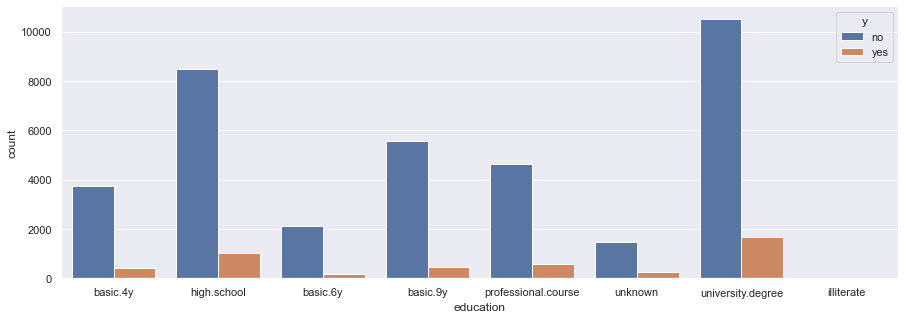

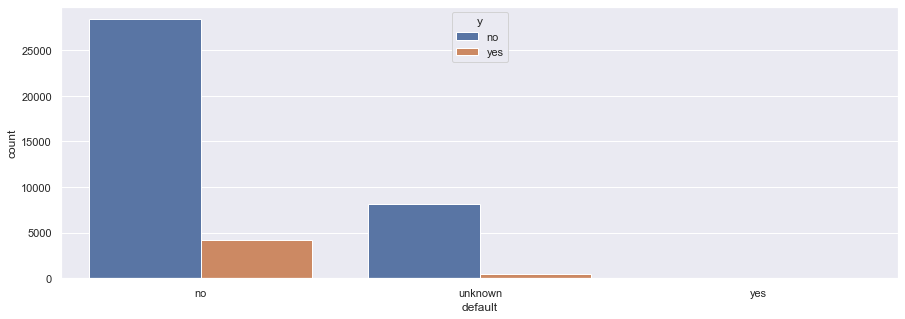

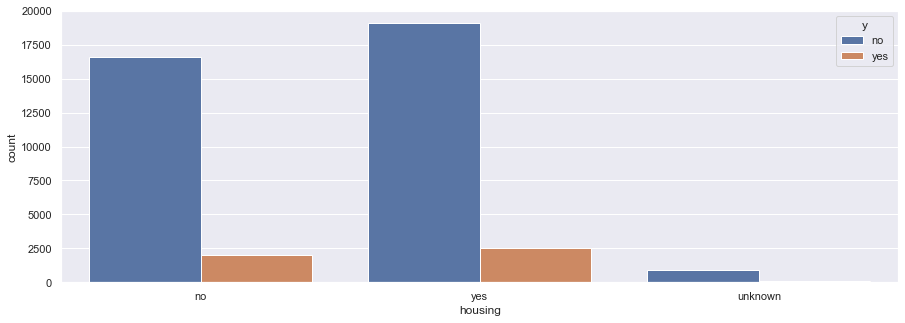

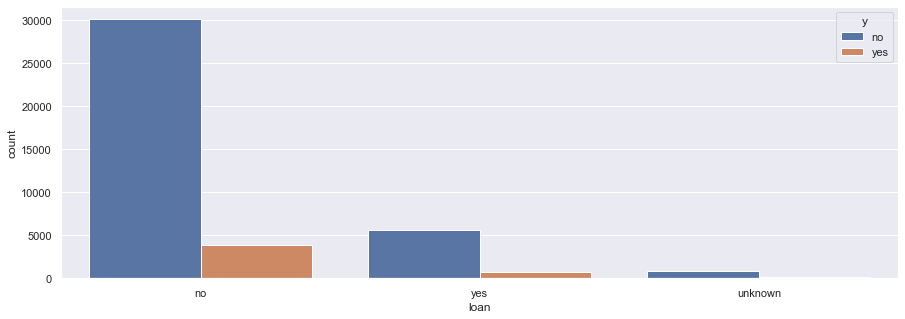

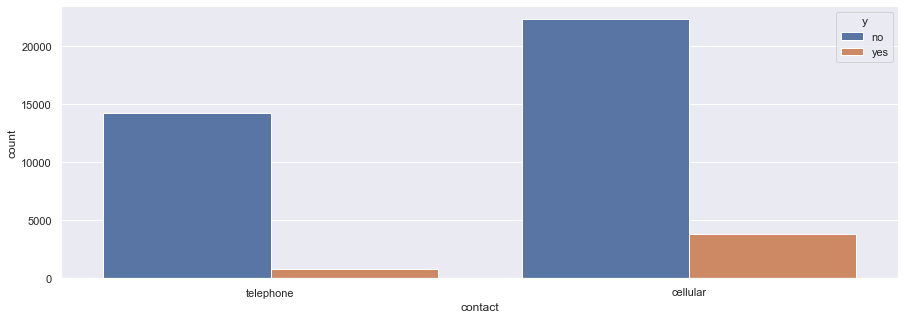

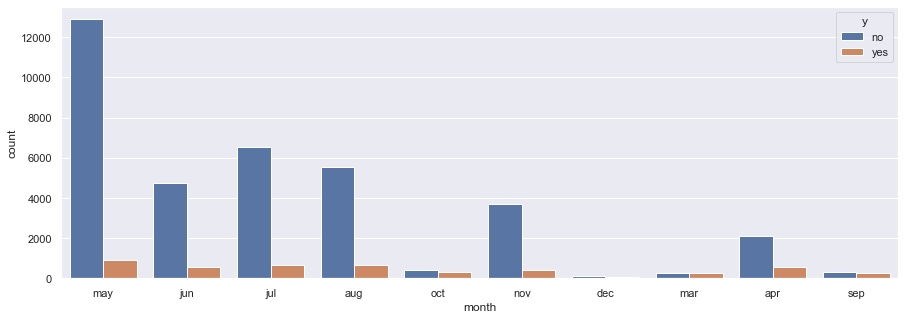

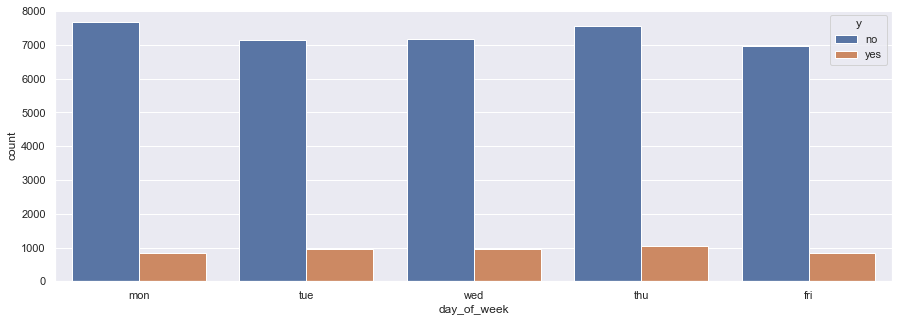

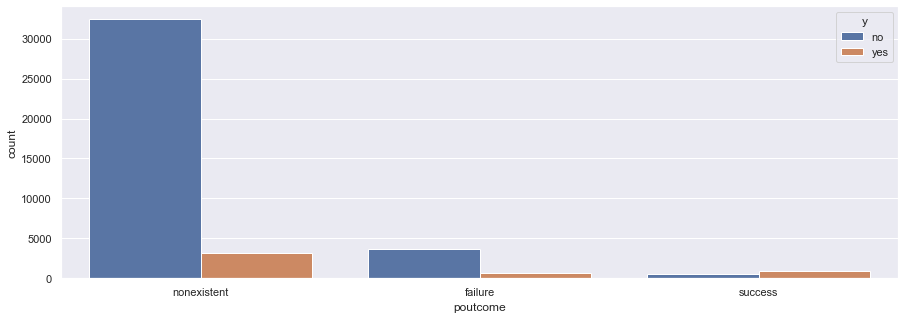

In [17]:
# looping through all columns except the target col
for col in category_features[0:-1]:
    #plot size
    plt.figure(figsize=(15,5))
    #seaborn countplot to indicate in each ID feature how many have said yes and No
    sns.countplot(data = df, x = col ,hue = df.columns[-1])

    With above we now come up with our first question 

    What does the primary analysis of several categorical features reveal?

<u>Our observations</u>

    Job :: The clients are mostly administrators, blue-collars and technicians.
    
    Marital status :: The clients are mostly married.
    
    Education :: The maximun number of clients have university degree followed by high school degree. The campaign targets more on educated people having to join their term deposit
       
    housing :: Most of the client have no house loan on them
    
    loan :: Most of the clients have no loan on them
    
    contact :: Most calls are on personal cellphones
    
    month :: May is the busy month and December is the least busy month due to the holidays season).
    
    day of week :: Monday's and Thursday's are most busy, Friday being the least due to weekend
    
    poutcome :: They do not have most of the clients data for previous campaign, whether they had agreed or not. One assumption is that the clients were called the first time in this campaign drive
    
    y :: Most of the client in this campaign havnt subscribed to the term deposit. The value for No is high than yes, leading to unbalance in data for our target variable
    
    Condidering the columns job, education and maritial status approx 80% of the times the outcome variable is a 'No'
    
    Duplicate values were dropped
    
    Along with this we also noticed that the problem statement had a mismatch in the number of columns.

Plotting box plots for numeric values

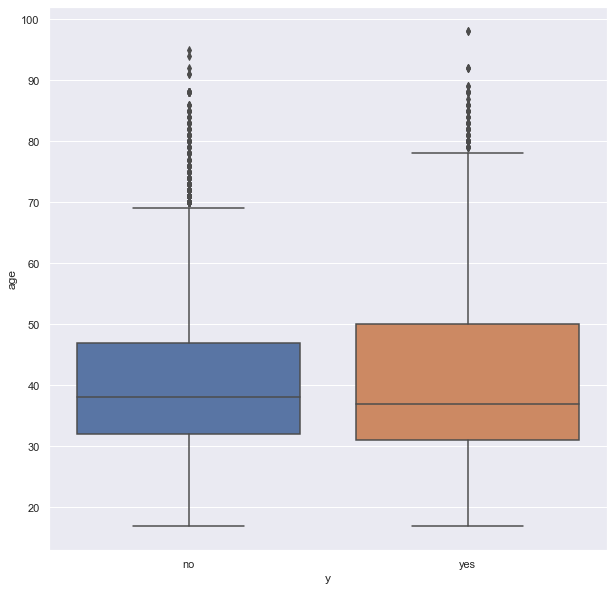

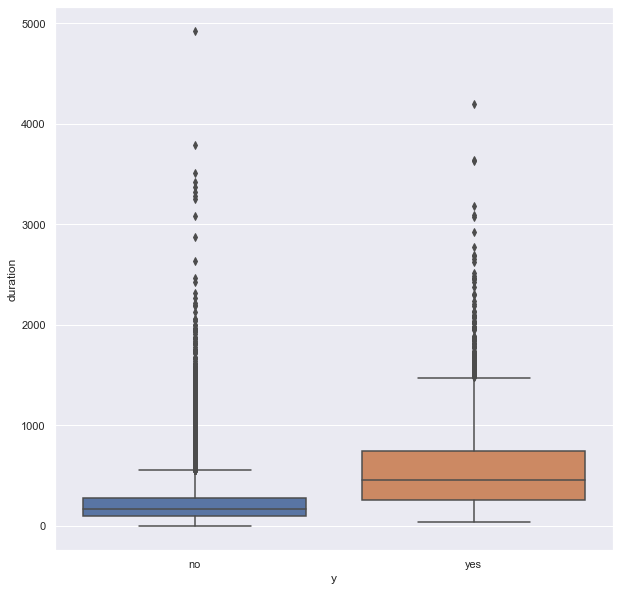

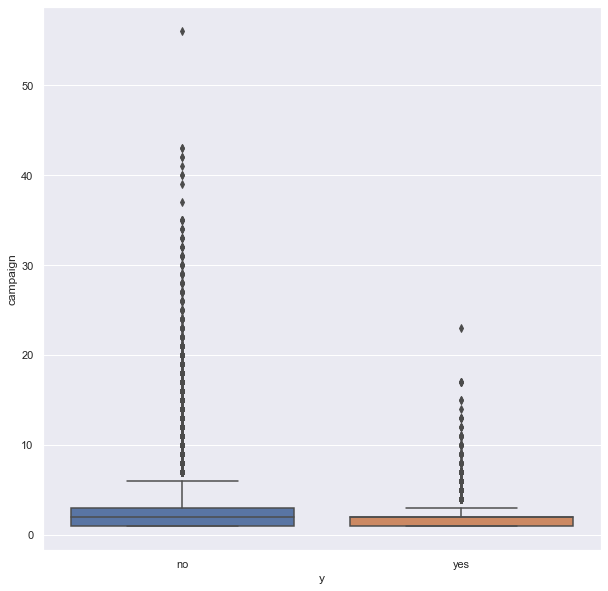

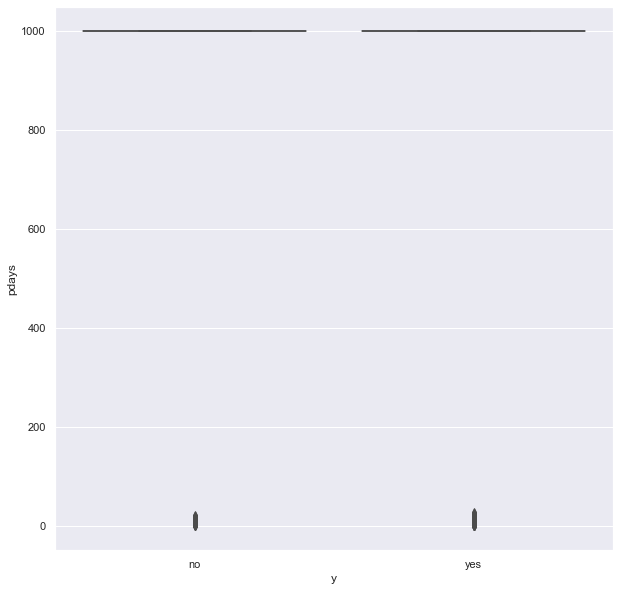

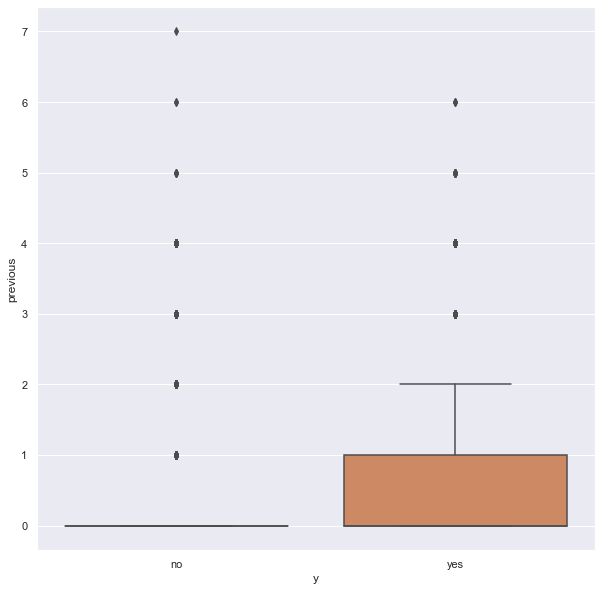

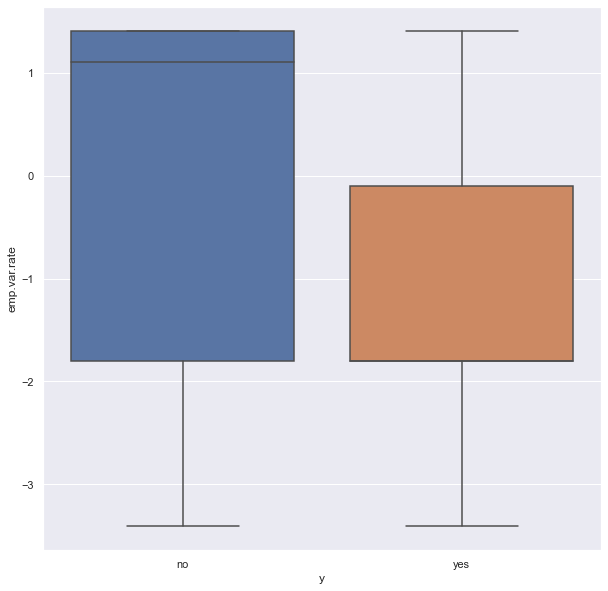

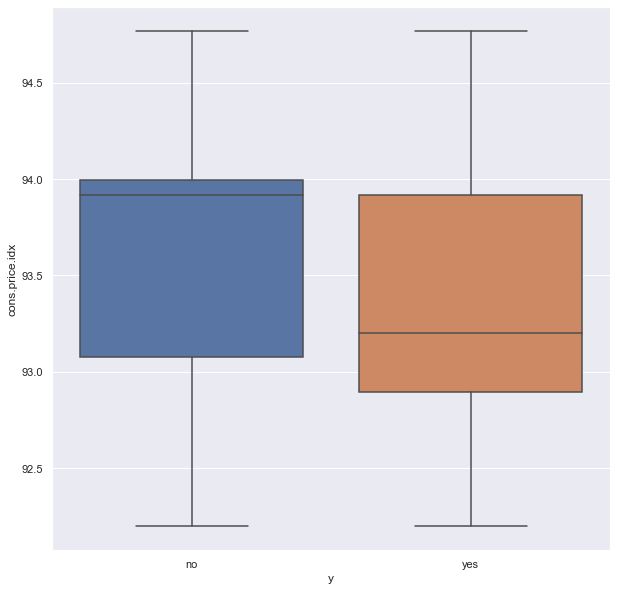

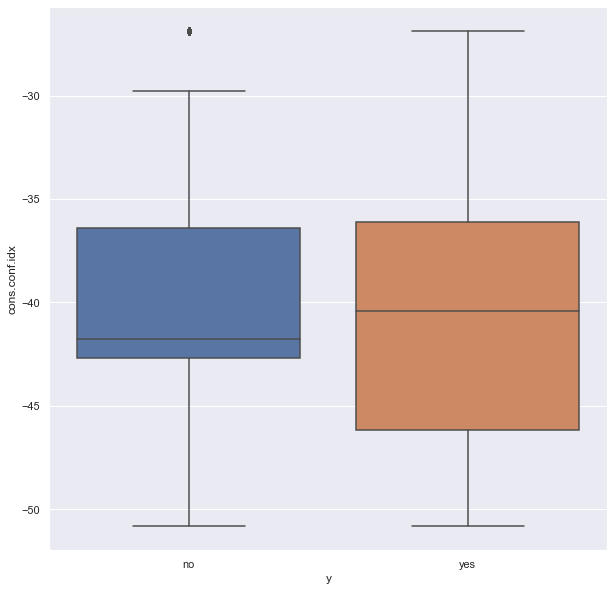

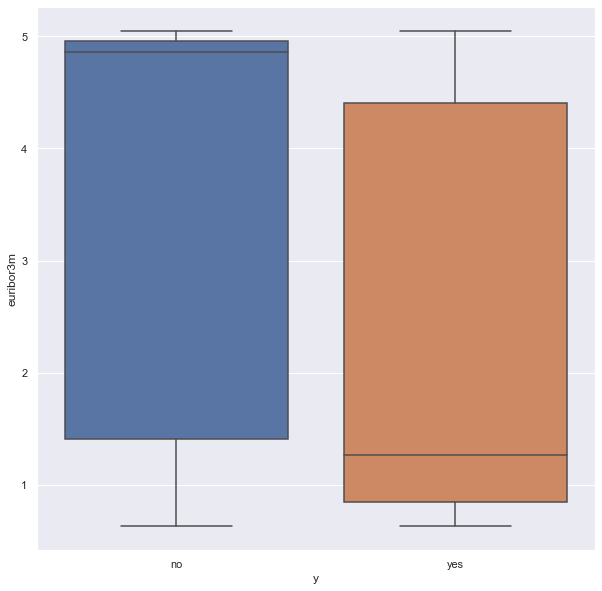

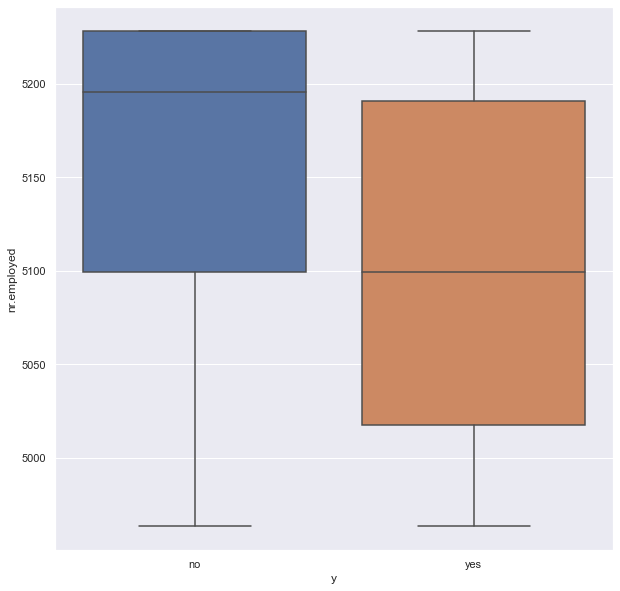

In [18]:
# looping through all columns except the target col
for col in numeric_feature:
    #plot size
    plt.figure(figsize=(10,10))
    sns.boxplot(df['y'],df[col])

<u>Observations</u>

    age :: Maximum values are present b/w 17 to 70 and less observation for above 70 leading to outliers
    previous :: very few people from the previous campain were called or less observations present
            

In [19]:
# creating a copy of the dataset
df_new = df

<u>Using Label Encoder to encode the data</u>

In [20]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder
# object creation
encoder_label = LabelEncoder()
#looping through all categories and encoding 
for col in category_features:
        df[col] = encoder_label.fit_transform(df[col])

In [21]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


<u>Splitting of X and Y variables</u>

In [22]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

In [23]:
X.shape

(41176, 20)

In [24]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [25]:
Y.shape

(41176,)

In [26]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [27]:
Y.value_counts()

0    36537
1     4639
Name: y, dtype: int64

<u>Insights</u>

    We see that there are very less observations of Yes class which may result into a low accuracy model. We shall first run all the models and re-run the models by upscaling the yes class to see if the error decreases
    
    Creating a copy of X and Y to be used later 

In [28]:
X_new = df.iloc[:,0:-1]
Y_new = df.iloc[:,-1]

Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [29]:
X.drop(['duration'], inplace = True, axis = 1)

<u>Scaling the Data using Standard Scaler</u>

We are using standard scaler as we have a variety of range and the minMax scaler will bring the data to the range of -1 to 1

In [30]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

Creating a generic function as we shall call the scaler object again after oversampling and running

In [31]:
def scale_X(X):
    scaler= StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    return X

In [32]:
X = scale_X(X)

We see that the data is scaled and ready for model building process

As we have a classification problem we shall define a generic code block to evaluate model performance

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_curve,auc
def evaluation(Y_test,Y_pred, plot_prediction,plot_ROC):
    

    cfm=confusion_matrix(Y_test,Y_pred)
    print("Confusion Metrics :\n",cfm)

    print("\n")
    print(pd.crosstab(Y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
    
    print("\nClassification report: \n")

    print(classification_report(Y_test,Y_pred))

    acc=accuracy_score(Y_test, Y_pred) #
    print("\nAccuracy of the model: ",acc)
    print('\n----- YTest v Y pred (30 values)---------')
    print('YTest :',Y_test.values[0:31])
    print('YPred :',Y_pred[0:31])
    fpr, tpr, z = roc_curve(Y_test, Y_pred)
    area_under_curve= auc(fpr,tpr)
    print("\nAUC : ",area_under_curve)
    

    if plot_ROC : 
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr,tpr, 'b', label = auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()
    
    if plot_prediction :
        plt.figure(figsize=(25,6))
        plt.title('Y_test v Y_pred for first 40 values')
        plt.plot(Y_test.values[0:41], label='Actual', linestyle='--', marker='o', color='g')
        plt.plot(Y_pred[0:41], label='Predicted', linestyle='--', marker='o', color='r')
        plt.legend(prop={'size': 20})
        plt.show()

<u>Splitting the data into train and test </u>

Creating a generic function

In [35]:
# Splitting the data in 70:30
from sklearn.model_selection import train_test_split

def split_train_test(X,Y):
    #Split the data into test and train using stratified :: equal proportion of target class 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10, stratify = Y)
    print('shape of X_train :: ',X_train.shape)
    print('shape of Y_train :: ',X_train.shape)
    print('shape of X_test :: ',X_train.shape)
    print('shape of Y_test :: ',X_train.shape)
    return X_train, X_test, Y_train, Y_test

In [36]:
X_train, X_test, Y_train, Y_test = split_train_test(X,Y)

shape of X_train ::  (28823, 19)
shape of Y_train ::  (28823, 19)
shape of X_test ::  (28823, 19)
shape of Y_test ::  (28823, 19)


In [37]:
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

<u> Performing Random Forest and eliminating not so significant variables<u/>

randomForest_model1 = RandomForestClassifier(random_state=10)

parameter_space = {
    'n_estimators': range(50,200,10),
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(3,10)
}
clf = GridSearchCV(randomForest_model1, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train,Y_train)

print('Best parameters found:\n', clf.best_params_)

    Best parameters found:
     {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 180}

We shall refrain from running this code again as it takes up time

Implementing Random Forest with this parameter obtain via gridSearch CV

Confusion Metrics :
 [[10788   173]
 [ 1055   337]]


Predicted      0    1    All
True                        
0          10788  173  10961
1           1055  337   1392
All        11843  510  12353

Classification report: 

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10961
           1       0.66      0.24      0.35      1392

    accuracy                           0.90     12353
   macro avg       0.79      0.61      0.65     12353
weighted avg       0.88      0.90      0.88     12353


Accuracy of the model:  0.9005909495669068

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
YPred : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]

AUC :  0.6131572348462206


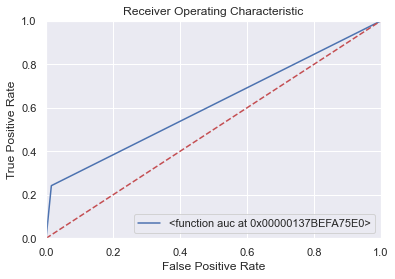

In [38]:
random=RandomForestClassifier(n_estimators=180, random_state=10, max_depth = 9 )
#fit the model on the data and predict the values
random.fit(X_train,Y_train)
Y_pred = random.predict(X_test)
evaluation(Y_test,Y_pred, False,True)

As we see from the above evaluation matrix ::
        
        - out of 1392 values for class yes only 337 values (True positive)  are predicted correctly.
        
        - for class No : the number of wrongly predicted values is 173
        
        - In this case, type 2 error (1055 obs) > type 1 error (173)
        
        - Our main goal should be the reduction of type 2 error
        
        - Even though the model accuracy is high, we can see the recall value of class 1 is badly affected, hence we say in  clasification models the accuracy score is ambiguous
        
        - the reason for such low value of recall is due to imbalance in data
        
        - our ideal model should have high recall value

Let us now check the important features list

In [39]:
d = dict(zip(df.columns,random.feature_importances_))
for w in sorted(d, key=d.get, reverse=True):
    print(w ,'\t\t::', d[w])

euribor3m 		:: 0.18321806304003813
cons.conf.idx 		:: 0.18259061508130345
campaign 		:: 0.11223792566477389
previous 		:: 0.0764401004146323
cons.price.idx 		:: 0.06688702290154815
poutcome 		:: 0.059724036072272696
age 		:: 0.055670487195922075
emp.var.rate 		:: 0.05422069962843003
month 		:: 0.03656013325117219
day_of_week 		:: 0.026867319023253226
duration 		:: 0.024819837209606992
job 		:: 0.0242385566487549
education 		:: 0.022633017976316925
pdays 		:: 0.020073162334374957
contact 		:: 0.020059170235543444
marital 		:: 0.01202519052003118
housing 		:: 0.00824134102028807
loan 		:: 0.007595777357326024
default 		:: 0.0058975444244114324


    we see the top features in descending ordered list
    out of 19 features let us select the top 15 features for predicting via other models

<u>Selecting the top 15 features and droping the rest</u>

In [40]:
X_new.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [41]:
X_new.shape

(41176, 20)

In [42]:
x = X_new.copy()
y = Y_new.copy()

In [43]:
x.drop(['default','loan','housing','marital', 'duration'], axis = 1, inplace = True)

In [44]:
x = scale_X(x)

In [46]:
X_train, X_test, Y_train, Y_test = split_train_test(x,y)

shape of X_train ::  (28823, 15)
shape of Y_train ::  (28823, 15)
shape of X_test ::  (28823, 15)
shape of Y_test ::  (28823, 15)


<u>Logistic Regression</u>

Creating a function so we can call the fucntion with oversampling test

In [65]:
def LR_model(X_train,Y_train,X_test,Y_test):
    #create a model
    LR = LogisticRegression()
    #fitting training data to the model
    LR.fit(X_train,Y_train)
    Y_pred = LR.predict(X_test)
    evaluation(Y_test,Y_pred, False,True)
    return LR.predict_proba(X_test)

Confusion Metrics :
 [[10816   145]
 [ 1103   289]]


Predicted      0    1    All
True                        
0          10816  145  10961
1           1103  289   1392
All        11919  434  12353

Classification report: 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10961
           1       0.67      0.21      0.32      1392

    accuracy                           0.90     12353
   macro avg       0.79      0.60      0.63     12353
weighted avg       0.88      0.90      0.87     12353


Accuracy of the model:  0.898971909657573

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
YPred : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]

AUC :  0.5971931112607185


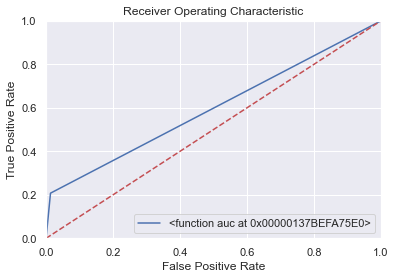

In [48]:
LR_model(X_train,Y_train,X_test,Y_test)

<u>SVM - SVC</u>

We shall try with both kernel as rbf and kernel as sigmoid (2 class prediction)

In [49]:
def SVM_SVC(X_train,Y_train,X_test,Y_test, kernel_parameter) : 
    svc_model = svm.SVC(kernel = kernel_parameter, C = 1, gamma = 0.1) #sigmoid
    svc_model.fit(X_train, Y_train)
    Y_pred = svc_model.predict(X_test)
    evaluation(Y_test,Y_pred, False,True)

Confusion Metrics :
 [[10786   175]
 [ 1053   339]]


Predicted      0    1    All
True                        
0          10786  175  10961
1           1053  339   1392
All        11839  514  12353

Classification report: 

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10961
           1       0.66      0.24      0.36      1392

    accuracy                           0.90     12353
   macro avg       0.79      0.61      0.65     12353
weighted avg       0.88      0.90      0.88     12353


Accuracy of the model:  0.9005909495669068

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
YPred : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

AUC :  0.613784393099044


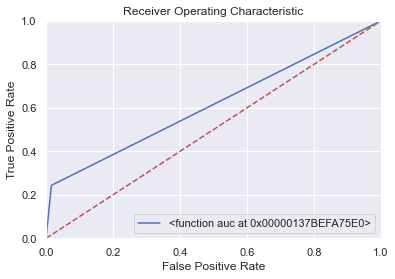

In [50]:
SVM_SVC(X_train,Y_train,X_test,Y_test, 'rbf')

    From above we see that 'rbf' is doing a better job the recall for both class has decreased

<u>AdaBoost</u>

In [52]:
def ADA_BOOST(X_train,Y_train,X_test,Y_test, estimators ):
    model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10),
                                      n_estimators=estimators,
                                      random_state=10)
    #fit the model on the data and predict the values
    model_AdaBoost.fit(X_train,Y_train)
    Y_pred=model_AdaBoost.predict(X_test)
    evaluation(Y_test,Y_pred, False,True)

Confusion Metrics :
 [[10340   621]
 [  935   457]]


Predicted      0     1    All
True                         
0          10340   621  10961
1            935   457   1392
All        11275  1078  12353

Classification report: 

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     10961
           1       0.42      0.33      0.37      1392

    accuracy                           0.87     12353
   macro avg       0.67      0.64      0.65     12353
weighted avg       0.86      0.87      0.87     12353


Accuracy of the model:  0.874038695053833

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
YPred : [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

AUC :  0.6358245915246008


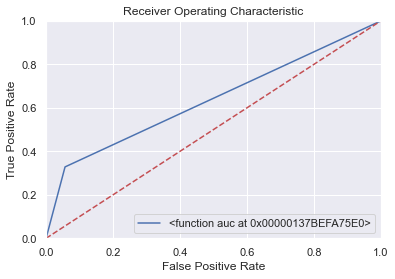

In [53]:
ADA_BOOST(X_train,Y_train,X_test,Y_test, int(150))

Till now we see that AdaBoost has a done a much better job than SVM and Random forest. The reason behind this is the prediction of class 1 has increased by 100 obs making the recall value to 33% and the prediction for class o has decreased from a recall of 98% to 94%

<u>KNN</u>

In [54]:
def KNN(X_train,Y_train,X_test,Y_test, neighbors, similarity_distance):
    knn = KNeighborsClassifier(n_neighbors = neighbors, metric = similarity_distance)                                
    knn.fit(X_train,Y_train)                               
    Y_pred = knn.predict(X_test)
    evaluation(Y_test,Y_pred, False, True)

Confusion Metrics :
 [[10834   127]
 [ 1116   276]]


Predicted      0    1    All
True                        
0          10834  127  10961
1           1116  276   1392
All        11950  403  12353

Classification report: 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10961
           1       0.68      0.20      0.31      1392

    accuracy                           0.90     12353
   macro avg       0.80      0.59      0.63     12353
weighted avg       0.88      0.90      0.87     12353


Accuracy of the model:  0.8993766696349065

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
YPred : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]

AUC :  0.5933446639968037


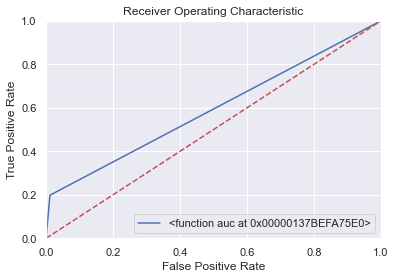

In [55]:
KNN(X_train,Y_train,X_test,Y_test, int(np.sqrt(X_train.shape[0])), 'manhattan')

### Analysis

<table style="height: 194px; width: 847px;">
<tbody>
<tr>
<td style="width: 79px;">Model&nbsp;</td>
<td style="width: 108px;">accuracy_score</td>
<td style="width: 39px;">
<p>recall&nbsp;</p>
<p>class 0</p>
</td>
<td style="width: 39px;">
<p>recall</p>
<p>class 1</p>
</td>
<td style="width: 119.328px;">auc</td>
<td style="width: 87px;">
<p>Class 0</p>
<p>(true negative)</p>
</td>
<td style="width: 98px;">
<p>class 0</p>
<p>(false positive)</p>
<p>type 1err</p>
</td>
<td style="width: 72px;">
<p>Class 0</p>
<p>(true positive)</p>
</td>
<td style="width: 102px;">
<p>class 0&nbsp;</p>
<p>(false negative)</p>
<p>type2err</p>
</td>
</tr>
<tr>
<td style="width: 79px;">&nbsp;Logistic</td>
<td style="width: 108px;">&nbsp;
<pre>0.898971909657573</pre>
</td>
<td style="width: 39px;">
<pre>0.99</pre>
</td>
<td style="width: 39px;">&nbsp;
<pre>0.21</pre>
</td>
<td style="width: 119.328px;">
<pre>0.5971931112607185</pre>
</td>
<td style="width: 87px;">
<pre>10816   </pre>
</td>
<td style="width: 98px;">
<pre>145</pre>
</td>
<td style="width: 72px;">
<pre>289</pre>
</td>
<td style="width: 102px;">&nbsp;
<pre>1103   </pre>
</td>
</tr>
<tr>
<td style="width: 79px;">Knn&nbsp;</td>
<td style="width: 108px;">&nbsp;
<pre>0.8993766696349065</pre>
</td>
<td style="width: 39px;">
<pre>0.99</pre>
</td>
<td style="width: 39px;">&nbsp;
<pre>0.20</pre>
</td>
<td style="width: 119.328px;">
<pre>0.5933446639968037</pre>
</td>
<td style="width: 87px;">
<pre>10834   </pre>
</td>
<td style="width: 98px;">
<pre>127</pre>
</td>
<td style="width: 72px;">
<pre>276</pre>
</td>
<td style="width: 102px;">&nbsp;
<pre>1116   </pre>
</td>
</tr>
<tr>
<td style="width: 79px;">Random forest&nbsp;</td>
<td style="width: 108px;">&nbsp;
<pre>0.9003480935805067</pre>
</td>
<td style="width: 39px;">
<pre>0.98</pre>
</td>
<td style="width: 39px;">&nbsp;
<pre>0.24</pre>
</td>
<td style="width: 119.328px;">
<pre>0.6136475442713822</pre>
</td>
<td style="width: 87px;">
<pre>10783   </pre>
</td>
<td style="width: 98px;">
<pre>178</pre>
</td>
<td style="width: 72px;">
<pre>339</pre>
</td>
<td style="width: 102px;">&nbsp;
<pre>1053   </pre>
</td>
</tr>
<tr>
<td style="width: 79px;">Adaboost&nbsp;</td>
<td style="width: 108px;">&nbsp;
<pre>0.874038695053833</pre>
</td>
<td style="width: 39px;">
<pre>0.94</pre>
</td>
<td style="width: 39px;">&nbsp;
<pre>0.33</pre>
</td>
<td style="width: 119.328px;">
<pre>0.6358245915246008</pre>
</td>
<td style="width: 87px;">
<pre>10340   </pre>
</td>
<td style="width: 98px;">
<pre>621</pre>
</td>
<td style="width: 72px;">
<pre>457</pre>
</td>
<td style="width: 102px;">&nbsp;
<pre>935   </pre>
</td>
</tr>
<tr>
<td style="width: 79px;">SVM&nbsp;</td>
<td style="width: 108px;">&nbsp;
<pre>0.9005909495669068</pre>
</td>
<td style="width: 39px;">
<pre>0.98</pre>
</td>
<td style="width: 39px;">&nbsp;
<pre>0.24</pre>
</td>
<td style="width: 119.328px;">
<pre>0.613784393099044</pre>
</td>
<td style="width: 87px;">
<pre>10786   </pre>
</td>
<td style="width: 98px;">
<pre>175</pre>
</td>
<td style="width: 72px;">
<pre>339</pre>
</td>
<td style="width: 102px;">&nbsp;
<pre>1053   </pre>
</td>
</tr>
</tbody>
</table>
<!-- DivTable.com -->

We see that logistic , Knn and Random forest have the AUC of 0.59,0.59 & 0.61 which means the model is doing a worst job and is randomly guessing

Adaboost has the highest accuracy and recall for class 1 among all and is doing a poor job but better than other models followed by SVM

## Implementing SMOTE and trying adaboost

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
sm = SMOTE(random_state = 2)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

In [58]:
X_train_res.shape

(51152, 15)

In [59]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(Y_train.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

Before OverSampling, the shape of train_X: (28823, 15)
Before OverSampling, the shape of train_y: (28823,) 

Before OverSampling, counts of label '1': 3247
Before OverSampling, counts of label '0': 25576 



In [60]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res == 0)))

After OverSampling, the shape of train_X: (51152, 15)
After OverSampling, the shape of train_y: (51152,) 

After OverSampling, counts of label '1': 25576
After OverSampling, counts of label '0': 25576


Confusion Metrics :
 [[10200   761]
 [  872   520]]


Predicted      0     1    All
True                         
0          10200   761  10961
1            872   520   1392
All        11072  1281  12353

Classification report: 

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     10961
           1       0.41      0.37      0.39      1392

    accuracy                           0.87     12353
   macro avg       0.66      0.65      0.66     12353
weighted avg       0.86      0.87      0.87     12353


Accuracy of the model:  0.867805391402898

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
YPred : [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

AUC :  0.6520676232452153


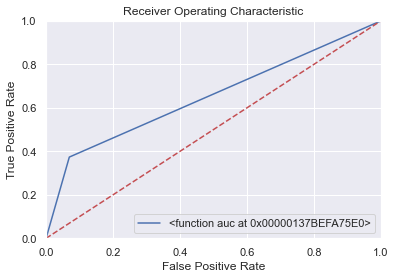

In [61]:
ADA_BOOST(X_train_res,Y_train_res,X_test,Y_test, int(100))

Adaboost model's auc has increased but the recall value is still in the same range 

#### SVM

Confusion Metrics :
 [[9584 1377]
 [ 553  839]]


Predicted      0     1    All
True                         
0           9584  1377  10961
1            553   839   1392
All        10137  2216  12353

Classification report: 

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     10961
           1       0.38      0.60      0.47      1392

    accuracy                           0.84     12353
   macro avg       0.66      0.74      0.69     12353
weighted avg       0.88      0.84      0.86     12353


Accuracy of the model:  0.8437626487492916

----- YTest v Y pred (30 values)---------
YTest : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
YPred : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]

AUC :  0.738551330632011


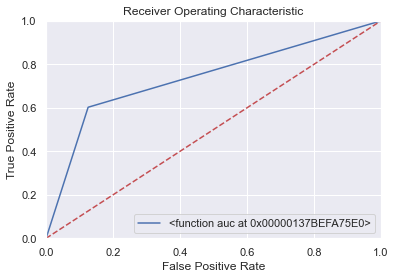

In [79]:
SVM_SVC(X_train_res,Y_train_res,X_test,Y_test, 'rbf')

### Conclusion

The model SVM_SVC performs the best after oversampling the minority class having a recall of 0.6 and auc of  0.73855133063201, which is best for predicting the values for client